In [2]:
#
# This notebook is a derivative of Udacity's CV-ND PyTorch Exercises.
# Original notebooks can be found at,
# https://github.com/udacity/DL_PyTorch
#

#Objective : Train a Feed Forward Neural Network on MNIST dataset.

#import PyTorch, NumPy

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import helper # From Udacity CV-ND 

import torch
import matplotlib.pyplot as plt

#import torchvision
from torchvision import datasets, transforms

from torch import nn
from torch import optim
import torch.nn.functional as F
from collections import OrderedDict

#Normalization.
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5, ), (0.5, )),
                             ])
# Download training dataset
trainset = datasets.MNIST('MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download test dataset
testset = datasets.MNIST('MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)



#Hyperparameters for Feed forward network with 3 hidden layers.

pic_dim_w=28
pic_dim_h=28
input_size = pic_dim_w*pic_dim_h
hidden_size = [400,200,100]
output_size = 10

model= nn.Sequential(OrderedDict([
                      ('fc1',nn.Linear(input_size,hidden_size[0])),
                      ('relu1',nn.ReLU()),
                      ('fc2',nn.Linear(hidden_size[0],hidden_size[1])),
                      ('relu2',nn.ReLU()),
                      ('fc3',nn.Linear(hidden_size[1],hidden_size[2])),
                      ('relu3',nn.ReLU()),
                      ('output',nn.Linear(hidden_size[2],output_size)),
                      ('softmax',nn.Softmax(dim=1))                
                    ]))

model

Sequential(
  (fc1): Linear(in_features=784, out_features=400, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=400, out_features=200, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=200, out_features=100, bias=True)
  (relu3): ReLU()
  (output): Linear(in_features=100, out_features=10, bias=True)
  (softmax): Softmax()
)

torch.Size([64, 1, 784])


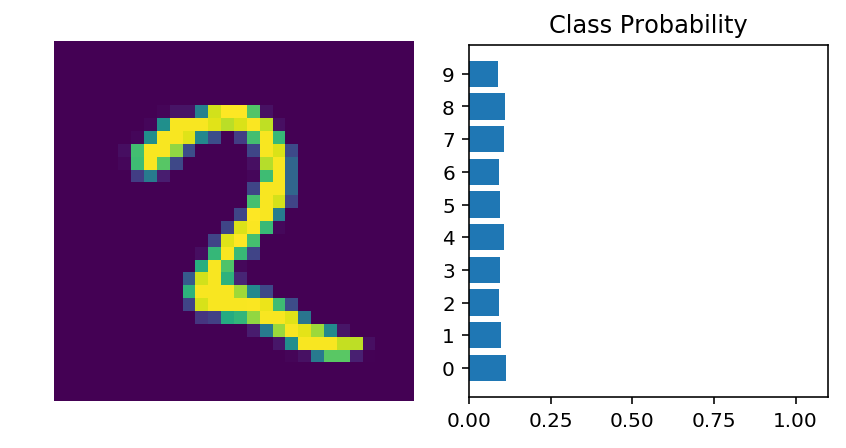

In [3]:
dataiter = iter(trainloader)
images,labels=dataiter.next()
images.resize_(images.shape[0], 1, 784)

print(images.shape)
ps = model.forward(images[0,:])
helper.view_classify(images[0].view(1, 28, 28), ps)

In [ ]:
#Train the network.
#Do Forward and Backward Propagation.
#Update weights tensors.


#Remove softmax for raw logits 

model= nn.Sequential(OrderedDict([
                      ('fc1',nn.Linear(input_size,hidden_size[0])),
                      ('relu1',nn.ReLU()),
                      ('fc2',nn.Linear(hidden_size[0],hidden_size[1])),
                      ('relu2',nn.ReLU()),
                      ('fc3',nn.Linear(hidden_size[1],hidden_size[2])),
                      ('relu3',nn.ReLU()),
                      ('output',nn.Linear(hidden_size[2],output_size)),
                    #  ('softmax',nn.Softmax(dim=1))                
                    ]))

#Cross Entropy Loss.
criterion=nn.CrossEntropyLoss()

#Use Stochastic Gradient Descent as optimizer

#Learning rate
learn_rate=0.01
optimizer=optim.SGD(model.parameters(), lr=learn_rate)

epochs = 5
print_step=100
steps=0


for e in range(epochs):
    #running_loss =0;
    for images,labels in iter(trainloader):
        steps+=1
        images.resize_(images.size()[0], 784)
#Clear accumulated gradients
        optimizer.zero_grad()
#Forward Propagation
        output=model.forward(images)
#Loss with logits
        loss=criterion(output,labels)
#Backward propagation
        loss.backward()
#Update Weights.
        optimizer.step()
        if steps%print_step==0:
            print("Epoch->",epochs)
    

Epoch-> 5
Epoch-> 5
Epoch-> 5
Epoch-> 5
Epoch-> 5
Epoch-> 5
Epoch-> 5
Epoch-> 5
Epoch-> 5
Epoch-> 5
Epoch-> 5
Epoch-> 5
Epoch-> 5
Epoch-> 5
Epoch-> 5
Epoch-> 5
Epoch-> 5
Epoch-> 5
Epoch-> 5
Epoch-> 5
Epoch-> 5
Epoch-> 5
Epoch-> 5
Epoch-> 5
Epoch-> 5
Epoch-> 5
Epoch-> 5
Epoch-> 5
Epoch-> 5
Epoch-> 5
Epoch-> 5
Epoch-> 5


In [ ]:
#Prediction

images, labels = next(iter(trainloader))